In [1]:
import os
import nltk
import numpy as np
from copy import deepcopy
from random import shuffle
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras import layers


[nltk_data] Downloading package stopwords to C:\Users\Malk
[nltk_data]     al\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# testing open file
f = open("product_reviews/product_reviews/ipod.txt", "r").read()
d = f.splitlines()
print(d[:3])

["##Don't get this...keep browsing. ", '##The iPod has so far been one of the most advertised and populated MP3 players so far. ', "##I'm still figuring out why."]


In [3]:
# read text files and then divide the sentence into positive, negative
# and neutral (has no signe)

positive = []
negative = []
neutral = []

path = "product_reviews/product_reviews"
for  file in os.listdir(path):
    
    if("README.txt") in file:
        continue
    filename = os.path.join(path, file)
    print(filename)
    
    f = open(str(filename), "r")
    file = f.read()
    
    # split the filte into sentances by line
    data = file.splitlines()
    
    for sent in data:
        if "[+" in sent:
            positive.append(sent)
        elif "[-" in sent:
            negative.append(sent)
        else:
            neutral.append(sent)
        

product_reviews/product_reviews\Canon_PowerShot_SD500.txt
product_reviews/product_reviews\Canon_S100.txt
product_reviews/product_reviews\Diaper_Champ.txt
product_reviews/product_reviews\Hitachi_router.txt
product_reviews/product_reviews\ipod.txt
product_reviews/product_reviews\Linksys_Router.txt
product_reviews/product_reviews\MicroMP3.txt
product_reviews/product_reviews\Nokia_6600.txt
product_reviews/product_reviews\norton.txt


In [4]:
print("positive: ",len(positive))
print(positive[:3])
print()
print("negative: ",len(negative))
print(negative[:3])
print()
print("neutral: ",len(neutral))
print(neutral[:3])

positive:  1380
['SD500[+2]##We really enjoyed shooting with the Canon PowerShot SD500. ', "design[+2]##It has an exterior design that combines form and function more elegantly than any point-and-shoot we've ever tested. ", 'image-processing system[+1]##A Digic II-powered image-processing system enables the SD500 to snap a limitless stream of 7-megapixel photos at a respectable clip, its start-up time is tops in its class, and it delivers decent photos when compared to its competition. ']

negative:  736
['pricey[-1]##I thought given all the "10" reviews about this camera that I would buy it in spite of being a bit pricey. ', 'LCD[-1]##I did see the review here and other places about a cracked LCD screen. ', 'LCD[-1]##When I went to put in the new SD Card I looked at the LCD Screen -- CRACKED-- and the fluid gave a Jackson Pollock type appearance to the screen, black and blue and purple blotches and streaks --useless. ']

neutral:  2468
['[t]', "##I've had it for about a month and it i

# cleaning the data

In [5]:
# testing the split funcion

# print(positive[0], "\n")
# print(command)
# print(sep)
# print(parameter)

In [6]:
def process_document(docs):
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    all_stopwords = stopwords.words('english')
    tokenized = []
    for sent in docs:
        # split the string when it finds ## 
        (command, sep, sentance) = sent.partition('##')
        wordsList=[]
        # only process the data after ##
        for w in sentance.split():
            filtired = tokenizer.tokenize(w.lower())
            try:
                # checks if a word is a stop words
                if not filtired[0] in all_stopwords and len(filtired[0])>1:
                    wordsList.append(filtired[0])
            except:
                ...
        tokenized.append(wordsList)
    
    return tokenized

In [7]:
# clean all the data
tokenized_positive = process_document(positive)
tokenized_negative = process_document(negative)

positiveSize = len(tokenized_positive)
negativeSize = len(tokenized_negative)


print("positive: ", positiveSize)
print("negative: ", negativeSize)

print()
# grouap the data into one list
all_sentance = []
all_sentance += tokenized_positive
all_sentance += tokenized_negative
print("all sentance:", len(all_sentance))

# creates lables for the data
labels = []
labels += [1 for i in range(positiveSize)]
labels += [0 for i in range(negativeSize)]
print("labels:", len(labels))

# convert lsit of word into a single string
sentences = deepcopy(all_sentance)
for i in range(len(sentences)):
    sentences[i] = ' '.join(sentences[i])
    
print()
print("sentences:", len(sentences))
print(sentences[:3])

# add lables to the sentances 
data = list(zip(sentences, labels))
shuffle(data)
len(data)

positive:  1380
negative:  736

all sentance: 2116
labels: 2116

sentences: 2116
['really enjoyed shooting canon powershot sd500', 'exterior design combines form function elegantly point ever tested', 'digic ii image system enables sd500 snap limitless stream photos respectable clip start time tops class delivers decent photos compared competition']


2116

In [8]:
from sklearn.model_selection import train_test_split

# split the data into test and train just to try the models
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2)
print(sentences_train[:3])
print(y_train[:3])


['recenly variable speed control went', 'pros signal strength configuration options', 'product worked perfectly xp']
[0, 1, 1]


In [15]:
# created the word embedding 
# vocabulary of all the unique words in the sentences
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

y_train = np.array(y_train)
y_test = np.array(y_test)


print(X_train.shape)

(1692, 3617)


In [10]:
# from sklearn.linear_model import LogisticRegression

# classifier = LogisticRegression()
# classifier.fit(X_train, y_train)
# score = classifier.score(X_test, y_test)

# print(score*100)

In [17]:
input_dim = X_train.shape[1]  # Number of features

In [18]:
# Tokenizer separates the sentences into a set of tokens
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

print(sentences_train[2])
print(X_train[2])
# pads the sequence of words with zeros
X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)
print()
print(sentences_train[2])
print(X_train[2])

product worked perfectly xp
[25, 187, 322, 581]

product worked perfectly xp
[ 25 187 322 581   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


# Find the best epoch number


In [19]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(
    input_dim=len(tokenizer.word_index) + 1, 
    output_dim=100, 
    input_length=100))

model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    X_train, 
    y_train, 
    epochs=25, 
    validation_data=(X_test, y_test), 
    batch_size=20
)
print()
_, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')
_, test_accuracy = model.evaluate(X_test, y_test)
print(f'Testing Accuracy: {test_accuracy:.4f}')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          361800    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 32)            16032     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 378,173
Trainable params: 378,173
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
85/85 [==============================] - 2s 20ms/step - loss: 0.6522 - accuracy: 0.6365 - val_loss: 0.6

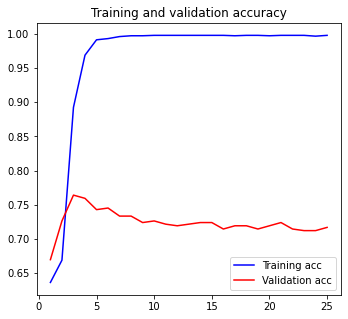

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

In [21]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


# test the pramerters

##### it takes (3 - 5) minits to complete

In [22]:
epochs = 20
embedding_dim = 50
maxlen = 100

# a grid of pramitest to be tested 
param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])

import time
start_time = time.time()

model = KerasClassifier(build_fn=create_model,
                        epochs=epochs, batch_size=10,
                        verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)
print(f'grid result best score  {grid_result.best_score_}')
print(f'grid result best params \n {grid_result.best_params_}')
print(f'test accuracy {test_accuracy}\n')

print("time taken %s seconds " % (time.time() - start_time))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
grid result best score  0.7192671298980713
grid result best params 
 {'vocab_size': 3618, 'num_filters': 128, 'maxlen': 100, 'kernel_size': 5, 'embedding_dim': 50}
test accuracy 0.7382075190544128

time taken 185.93085074424744 seconds 


# testing accuracy using 5-fold cross validation

In [23]:
# the summary of the model used but i will create another one later
#  this one one is used only for show
model = create_model(num_filters=128, kernel_size=5, vocab_size=vocab_size,
                     embedding_dim=embedding_dim, maxlen=maxlen)
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 100, 50)           180900    
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 94, 128)           44928     
_________________________________________________________________
global_max_pooling1d_23 (Glo (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 11        
Total params: 227,129
Trainable params: 227,129
Non-trainable params: 0
_________________________________________________________________


In [26]:
npData= np.array(data)

from sklearn.model_selection import KFold
sents, labels = zip(*data)
sents = np.array(sents)
labels = np.array(labels)
   

kf = KFold(n_splits=5, shuffle=True)
print("folds: ",kf.get_n_splits(npData),"\n")

accuracyList = []
for train_index, test_index in kf.split(npData):
#     print((test_index[:10]))
    
#     print(len(train_index), len(test_index))

    # get the data for testing and training
    sents_train = sents[train_index]
    sents_test = sents[test_index]
    
    y_train = labels[train_index]
    y_test = labels[test_index]
    
    #tokenize the words
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(sents_train)

    X_train = tokenizer.texts_to_sequences(sents_train)
    X_test = tokenizer.texts_to_sequences(sents_test)
    # add padding
    X_train = pad_sequences(X_train, padding='post', maxlen=100)
    X_test = pad_sequences(X_test, padding='post', maxlen=100)
    
    vocab_size = len(tokenizer.word_index) + 1
    
    # create the cnn model
    model = create_model(num_filters=128, kernel_size=5, vocab_size=vocab_size,
                     embedding_dim=embedding_dim, maxlen=maxlen)
    
    # train the model
    history = model.fit(
    X_train,
    y_train,
    epochs=25,
    validation_data=(X_test, y_test),
    batch_size=10,
    verbose=2)

    print()
    # training accuracy
    _, train_accuracy = model.evaluate(X_train, y_train, verbose=False)
    print(f'Training Accuracy: {train_accuracy:.4f}')
    
    # testing accuracy
    _, test_accuracy = model.evaluate(X_test, y_test, verbose=False)
    print(f'Testing Accuracy: {test_accuracy:.4f}')
    accuracyList.append(test_accuracy*100)

    


folds:  5 

Epoch 1/25
170/170 - 1s - loss: 0.6426 - accuracy: 0.6483 - val_loss: 0.6103 - val_accuracy: 0.6651
Epoch 2/25
170/170 - 1s - loss: 0.4838 - accuracy: 0.7376 - val_loss: 0.5707 - val_accuracy: 0.7075
Epoch 3/25
170/170 - 1s - loss: 0.2083 - accuracy: 0.9332 - val_loss: 0.7275 - val_accuracy: 0.7028
Epoch 4/25
170/170 - 1s - loss: 0.0715 - accuracy: 0.9770 - val_loss: 0.9108 - val_accuracy: 0.6745
Epoch 5/25
170/170 - 1s - loss: 0.0250 - accuracy: 0.9941 - val_loss: 1.0749 - val_accuracy: 0.7005
Epoch 6/25
170/170 - 1s - loss: 0.0118 - accuracy: 0.9959 - val_loss: 1.1903 - val_accuracy: 0.6981
Epoch 7/25
170/170 - 1s - loss: 0.0067 - accuracy: 0.9976 - val_loss: 1.2561 - val_accuracy: 0.6934
Epoch 8/25
170/170 - 1s - loss: 0.0052 - accuracy: 0.9976 - val_loss: 1.3346 - val_accuracy: 0.6958
Epoch 9/25
170/170 - 1s - loss: 0.0044 - accuracy: 0.9982 - val_loss: 1.4478 - val_accuracy: 0.6840
Epoch 10/25
170/170 - 1s - loss: 0.0042 - accuracy: 0.9976 - val_loss: 1.5168 - val_accu

Epoch 6/25
170/170 - 1s - loss: 0.0074 - accuracy: 0.9982 - val_loss: 1.0535 - val_accuracy: 0.7423
Epoch 7/25
170/170 - 1s - loss: 0.0056 - accuracy: 0.9982 - val_loss: 1.1052 - val_accuracy: 0.7470
Epoch 8/25
170/170 - 1s - loss: 0.0046 - accuracy: 0.9982 - val_loss: 1.1400 - val_accuracy: 0.7447
Epoch 9/25
170/170 - 1s - loss: 0.0041 - accuracy: 0.9988 - val_loss: 1.1904 - val_accuracy: 0.7470
Epoch 10/25
170/170 - 1s - loss: 0.0040 - accuracy: 0.9982 - val_loss: 1.2599 - val_accuracy: 0.7541
Epoch 11/25
170/170 - 1s - loss: 0.0037 - accuracy: 0.9982 - val_loss: 1.2833 - val_accuracy: 0.7423
Epoch 12/25
170/170 - 1s - loss: 0.0032 - accuracy: 0.9982 - val_loss: 1.3229 - val_accuracy: 0.7447
Epoch 13/25
170/170 - 1s - loss: 0.0030 - accuracy: 0.9988 - val_loss: 1.4379 - val_accuracy: 0.7329
Epoch 14/25
170/170 - 1s - loss: 0.0034 - accuracy: 0.9988 - val_loss: 1.3441 - val_accuracy: 0.7447
Epoch 15/25
170/170 - 1s - loss: 0.0030 - accuracy: 0.9988 - val_loss: 1.4023 - val_accuracy: 0

In [27]:
# print the mean and std from the mode 
print(accuracyList)
mean = np.mean(accuracyList)
std = np.std(accuracyList)
print("mean: ", mean)
print("standard deviation: ", std)

[67.92452931404114, 72.10401892662048, 75.8865237236023, 73.04964661598206, 73.758864402771]
mean:  72.5447165966034
standard deviation:  2.6243905599597923
